In [100]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')

In [101]:
df = pd.read_csv('/home/alma/Documentos/xPrize/data_alma/OxCGRT_latest.csv')

/home/alma/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [102]:
#Change blank space by _ in columns
df.rename(columns=lambda x: x.replace(' ','_').replace('/','_'), inplace=True)

In [120]:
df[df.RegionName.isna()==False].CountryName.unique()

array(['Brazil', 'United Kingdom', 'United States'], dtype=object)

In [119]:
df[(df.H7_Vaccination_policy != 0) & (df.H7_Vaccination_policy.isna()==False)].Date.unique()

array([20201125, 20201126, 20201127, 20201128, 20201129, 20201130,
       20201201, 20201202, 20201203, 20201204, 20201205, 20201206,
       20201207, 20201208])

In [124]:
#Assignate the correct type
df.Date = pd.to_datetime(df['Date'], format='%Y%m%d')
df = df.astype({'C1_School_closing':'category', 'C2_Workplace_closing':'category', 
           'C3_Cancel_public_events':'category','C4_Restrictions_on_gatherings':'category',
           'C5_Close_public_transport':'category', 'C6_Stay_at_home_requirements':'category', 
           'C7_Restrictions_on_internal_movement':'category', 'C8_International_travel_controls':'category', 
           'E1_Income_support':'category', 'E2_Debt_contract_relief':'category', 
           'H1_Public_information_campaigns':'category', 'H2_Testing_policy':'category', 
           'H3_Contact_tracing':'category',  
           'H6_Facial_Coverings':'category', 'H7_Vaccination_policy':'category', 'M1_Wildcard':'category'})

In [125]:
df.shape

(91160, 49)

In [126]:
df[df.RegionName.isna() == False].CountryName.unique()

array(['Brazil', 'United Kingdom', 'United States'], dtype=object)

In [127]:
#Number of nan
for col in df.columns:
    print(col, df[col].isnull().sum())

CountryName 0
CountryCode 0
RegionName 62608
RegionCode 62608
Jurisdiction 0
Date 0
C1_School_closing 3162
C1_Flag 24769
C2_Workplace_closing 3774
C2_Flag 30807
C3_Cancel_public_events 3766
C3_Flag 26950
C4_Restrictions_on_gatherings 3785
C4_Flag 30749
C5_Close_public_transport 3740
C5_Flag 53952
C6_Stay_at_home_requirements 3739
C6_Flag 37862
C7_Restrictions_on_internal_movement 2554
C7_Flag 39523
C8_International_travel_controls 3391
E1_Income_support 11540
E1_Flag 46379
E2_Debt_contract_relief 11577
E3_Fiscal_measures 23983
E4_International_support 23151
H1_Public_information_campaigns 3260
H1_Flag 14751
H2_Testing_policy 3510
H3_Contact_tracing 3544
H4_Emergency_investment_in_healthcare 23888
H5_Investment_in_vaccines 23719
H6_Facial_Coverings 3667
H6_Flag 35946
H7_Vaccination_policy 27191
H7_Flag 91130
M1_Wildcard 91160
ConfirmedCases 8163
ConfirmedDeaths 8297
StringencyIndex 3773
StringencyIndexForDisplay 3100
StringencyLegacyIndex 3773
StringencyLegacyIndexForDisplay 3100
Govern

In [26]:
#Create new variables for day, month and year
df['Month'] = df.Date.apply(lambda x: x.month)
df['Year'] = df.Date.apply(lambda x: x.year)
df['Day'] = df.Date.apply(lambda x: x.day)

In [27]:
df_na = df[df['ConfirmedCases'].isna()]
confirmed_cases_month_na = df_na.groupby('Month')['ConfirmedCases'].size()
confirmed_cases_na = df_na.groupby('Date')['ConfirmedCases'].size()

<AxesSubplot:xlabel='Month'>

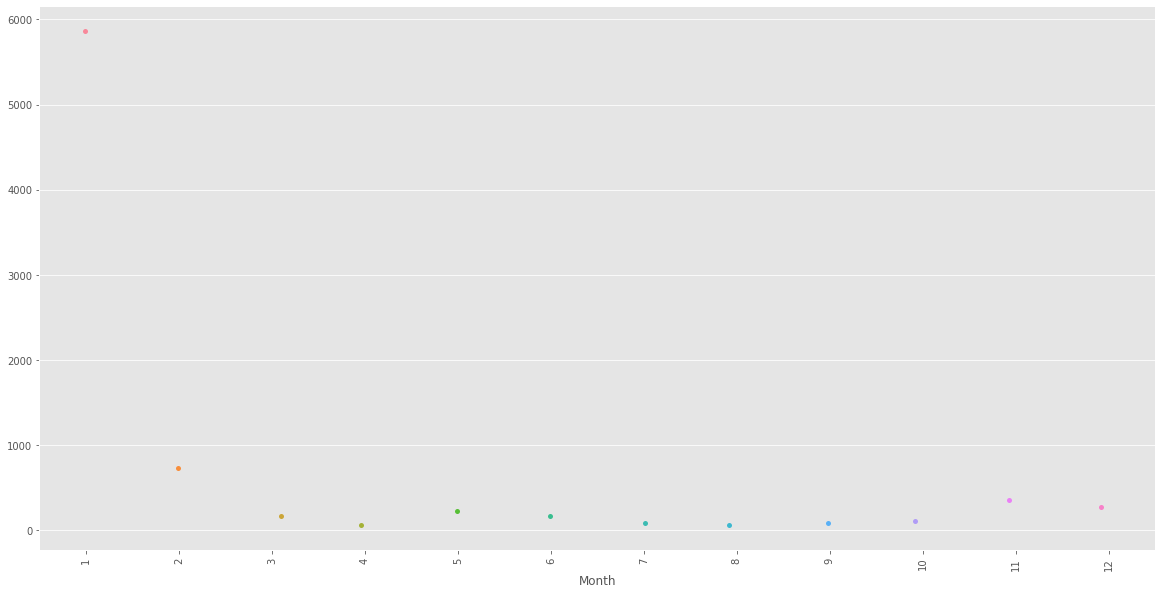

In [28]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.stripplot(x=confirmed_cases_month_na[confirmed_cases_month_na.values > 0].index, y=confirmed_cases_month_na[confirmed_cases_month_na.values > 0].values)

<AxesSubplot:xlabel='Date'>

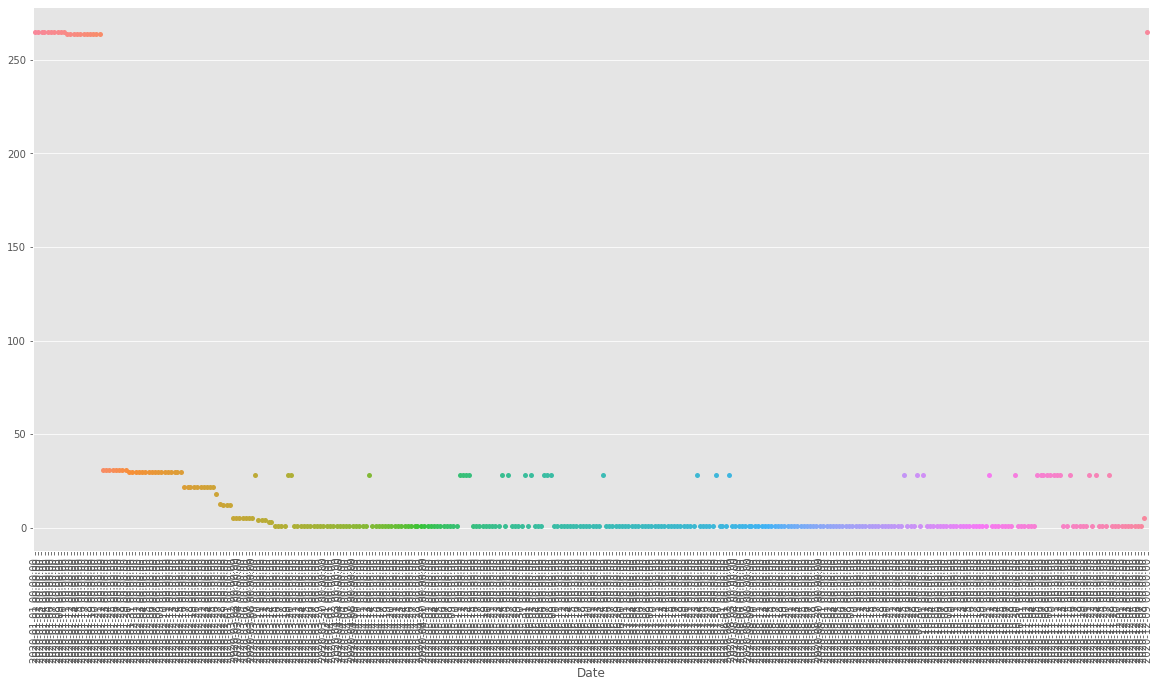

In [29]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.stripplot(x=confirmed_cases_na[confirmed_cases_na.values > 0].index, y=confirmed_cases_na[confirmed_cases_na.values > 0].values)

In [16]:
#Jurisdiction and M1can be dropped
#df.drop(['Jurisdiction','M1_Wildcard'], axis=1)

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School_closing,C1_Flag,C2_Workplace_closing,C2_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
7774,Brazil,BRA,Acre,BR_AC,STATE_TOTAL,2020-01-01,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
7775,Brazil,BRA,Acre,BR_AC,STATE_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
7776,Brazil,BRA,Acre,BR_AC,STATE_TOTAL,2020-01-03,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
7777,Brazil,BRA,Acre,BR_AC,STATE_TOTAL,2020-01-04,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
7778,Brazil,BRA,Acre,BR_AC,STATE_TOTAL,2020-01-05,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86523,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-11-29,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86524,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-11-30,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86525,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-12-01,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86526,United States,USA,Wyoming,US_WY,STATE_TOTAL,2020-12-02,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Fill NaN values by 0
df.C1_School_closing.fillna(0, inplace=True)
df.C2_Workplace_closing.fillna(0, inplace=True)
df.C3_Cancel_public_events.fillna(0, inplace=True)
df.C4_Restrictions_on_gatherings.fillna(0, inplace=True)
df.C5_Close_public_transport.fillna(0, inplace=True)
df.C6_Stay_at_home_requirements.fillna(0, inplace=True)
df.C7_Restrictions_on_internal_movement.fillna(0, inplace=True)
df.C8_International_travel_controls.fillna(0, inplace=True)
df.E1_Income_support.fillna(0, inplace=True)
df.E2_Debt_contract_relief.fillna(0, inplace=True)
df.E3_Fiscal_measures.fillna(0, inplace=True)
df.E4_International_support.fillna(0, inplace=True)
df.H1_Public_information_campaigns.fillna(0, inplace=True)
df.H2_Testing_policy.fillna(0, inplace=True)
df.H3_Contact_tracing.fillna(0, inplace=True)
df.H4_Emergency_investment_in_healthcare.fillna(0, inplace=True)
df.H5_Investment_in_vaccines.fillna(0, inplace=True)
df.H6_Facial_Coverings.fillna(0, inplace=True)
df.H7_Vaccination_policy.fillna(0, inplace=True)

In [22]:
#Only two countries has null values between march and november. So fill values with 0 
df[(df.ConfirmedCases.isna()) & (df.Date > '2020-03-01') & (df.Date < '2020-11-30')].CountryName.unique()
df[df.Date < '2020-11-30'].fillna(0, inplace=True)
df[df.Date >= '2020-11-30'].fillna(df., inplace=True)

array(['Brazil', 'Turkmenistan'], dtype=object)

In [62]:
#Delete turkmenistan data
indexes = df[df.CountryName=='Turkmenistan'].index
#df.drop(labels = indexes, axis=0, inplace=True)

In [93]:
#Filling ConfirmedDeaths for United Kingdom or countries before March to 0
df.loc[(df['CountryName']=='United Kingdom'), 'ConfirmedDeaths'] = df.loc[(df['CountryName']=='United Kingdom'), 'ConfirmedDeaths'].fillna(0)
df.loc[(df['Date']<'2020-03-01'), 'ConfirmedDeaths'] = df.loc[(df['Date']<'2020-03-01'), 'ConfirmedDeaths'].fillna(0)

In [99]:
df[(df.ConfirmedDeaths.isna()) & (df.CountryName == 'Brazil')].Date.unique())

50

In [130]:
df[((df.ConfirmedCases.isna()) & (df.CountryName=='Brazil')) & ((df.Date > '2020-03-01') & (df.Date < '2020-11-30'))].Date.unique()

array(['2020-03-02T00:00:00.000000000', '2020-03-03T00:00:00.000000000',
       '2020-03-04T00:00:00.000000000', '2020-03-05T00:00:00.000000000',
       '2020-03-06T00:00:00.000000000', '2020-03-07T00:00:00.000000000',
       '2020-03-08T00:00:00.000000000', '2020-03-09T00:00:00.000000000',
       '2020-03-19T00:00:00.000000000', '2020-03-20T00:00:00.000000000',
       '2020-04-13T00:00:00.000000000', '2020-05-11T00:00:00.000000000',
       '2020-05-12T00:00:00.000000000', '2020-05-13T00:00:00.000000000',
       '2020-05-14T00:00:00.000000000', '2020-05-24T00:00:00.000000000',
       '2020-05-26T00:00:00.000000000', '2020-05-31T00:00:00.000000000',
       '2020-06-02T00:00:00.000000000', '2020-06-06T00:00:00.000000000',
       '2020-06-07T00:00:00.000000000', '2020-06-08T00:00:00.000000000',
       '2020-06-24T00:00:00.000000000', '2020-07-23T00:00:00.000000000',
       '2020-07-29T00:00:00.000000000', '2020-08-02T00:00:00.000000000',
       '2020-09-25T00:00:00.000000000', '2020-09-29